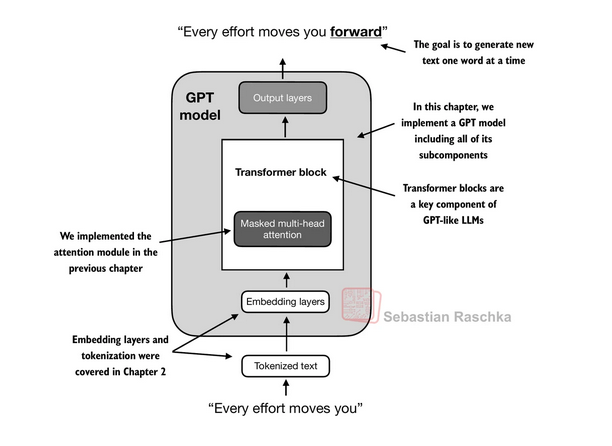
- Configuration details for the 124 million parameter GPT-2 model 

In [ ]:
import sysconfig
from importlib.metadata import version


In [27]:
import torch
import torch.nn as nn


In [28]:
GPT_CONFIG_24M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dem": 768,
    "n_head":12,
    "n_layer":12,
    "drop_rate":0.1,
    "qkv_bias": False
}

In [29]:
import tiktoken 
tokenizer = tiktoken.get_encoding("gpt2")

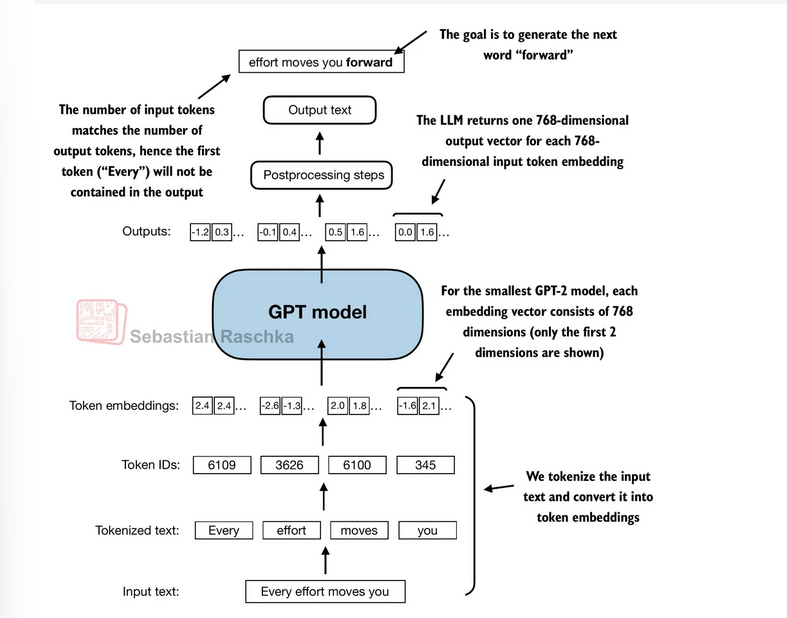

- normalization is the activitions nn layer around mean of 0 and normalize variance to 1
- helps to stabilize and faster convergences to effective weights
- applied both before and after the multi-head attention, final output layer

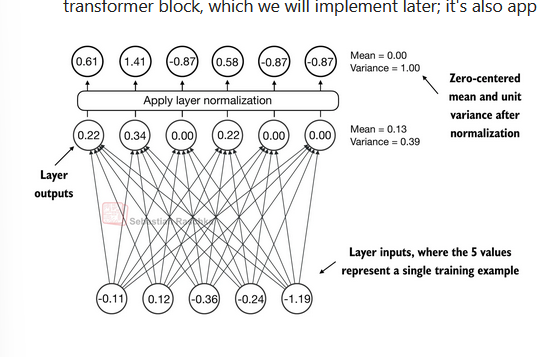

- dimension [ dim--> 0 the first index
              dim--> -1 the last index]
- scale and shifts are trainable parameters that helps to auto adjust during training
- eps (~ 0) to avoid division-to-zero error incase the var is 0

In [30]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

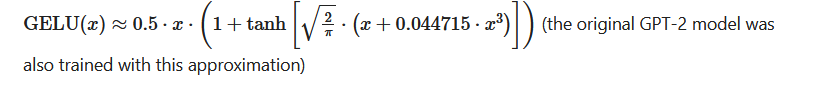
- GELU is non-linear function, non-zero gradient for negative values

In [31]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x):
        return 0.5*x*(1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(x+0.044715*torch.pow(x,3))))

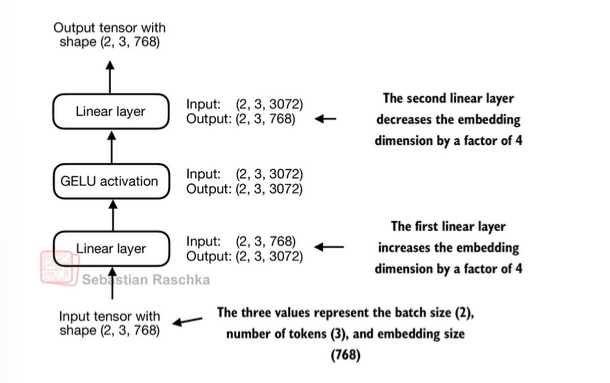

In [34]:


class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)



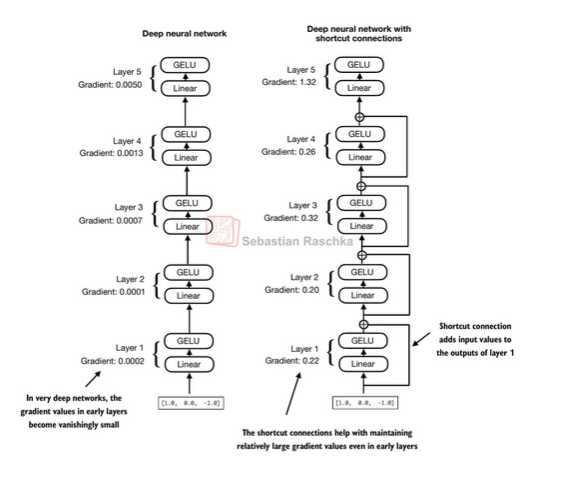
- shortcut or skip/residual connection to solve the gradient problem
- it works by connecting the output of one layer to another 

In [39]:

from Attention_mechanism import MultiHeadAttn

ImportError: cannot import name 'MultiHeadAttn' from 'Attention_mechanism' (e:\Projects\langchain\JupyterProject\Attention_mechanism.py)